# Зарплаты в аналитической индустрии

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/amirhan/Downloads/archive/Salary Dataset.csv')
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


### Чистим колонку зарплата

In [4]:
data['Money'] = data['Salary'].str.slice(start=0, stop=1) # slice - вырезает выбранный диапозон(0 до 1, первый символ )

In [11]:
data['Period'] = data['Salary'].str.split('/', n = 1, expand=True)[1]

In [14]:
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Money,Period,Quantity
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,"6,48,573"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,"11,91,950"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,"8,36,874"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,"6,69,578"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,"9,44,110"


In [7]:
data['Period'] = data['Salary'].str.split('/', expand=True)[1] #выбираем второе значение после /

In [13]:
data['Quantity'] = data['Salary'].str.split('/', n = 1, expand=True)[0].str.slice(start=1) #выбираем значение до / 

In [15]:
data['Quantity'] = data['Quantity'].str.replace(',', '') #заменяем запятую на пустоту

In [16]:
# Удаляем не нужную нам валюту из датасета
td = data.loc[data['Money']=='A'].index
df = data.drop(td, axis=0)

In [17]:
# переведм кол-во в тип флоат
df['Quantity'] = df['Quantity'].astype(float)

### Переведем все показатели Period в yr

In [18]:
df['Period'].unique() # у нас три показателя год, месяц, час

array(['yr', 'mo', 'hr'], dtype=object)

In [19]:
df['Quantity'].loc[df['Period']=='mo'] = df['Quantity'] * 12
df['Quantity'].loc[df['Period']=='hr'] = df['Quantity'] * 12 * 40

/Users/amirhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
df['Money'].unique()

array(['₹', '$', '£'], dtype=object)

In [21]:
# трансформируем все валюты в доллоры
df['Quantity'].loc[df['Money'] == '₹'] = df['Quantity'] * 0.013
df['Quantity'].loc[df['Money'] == '£'] = df['Quantity'] * 1.11

In [22]:
df.loc[df['Salaries Reported'].isna()] # смотрим какие значения нулы
df.dropna(subset=['Salaries Reported'], inplace=True) # дропаем все нулы 

In [23]:
# заменяем компании без имени на Other
df.loc[df['Company Name'].isna()] # проверяем есть ли компании с пустым значением
df['Company Name'] = df['Company Name'].fillna('Other') # Пишем в скобках значение которое хотим увидеть
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4341 entries, 0 to 4343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4341 non-null   object 
 2   Salaries Reported  4341 non-null   float64
 3   Location           4341 non-null   object 
 4   Salary             4341 non-null   object 
 5   Money              4341 non-null   object 
 6   Period             4341 non-null   object 
 7   Quantity           4341 non-null   float64
dtypes: float64(2), object(6)
memory usage: 305.2+ KB


In [24]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Money,Period,Quantity
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,8431.449
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,15495.350
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,10879.362
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,8704.514
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,12273.430


In [25]:
df['Money'] = df['Money'].str.replace('₹', '$')
df['Money'] = df['Money'].str.replace('£', '$')

In [26]:
df['Quantity'] = df['Quantity'] / df['Salaries Reported']

In [27]:
df.drop(['Salaries Reported','Money','Period'], axis=1, inplace=True)

In [30]:
df

,Company Name,Job Title,Location,Quantity
0,Mu Sigma,Data Scientist,Bangalore,80.299514
1,IBM,Data Scientist,Bangalore,163.108947
2,Tata Consultancy Services,Data Scientist,Bangalore,164.838818
3,Impact Analytics,Data Scientist,Bangalore,217.612850
4,Accenture,Data Scientist,Bangalore,383.544688
...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,Mumbai,808.080000
4340,Decimal Point Analytics,Machine Learning Developer,Mumbai,9766.718000
4341,MyWays,Machine Learning Developer,Mumbai,5342.376000
4342,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,20960.212000


### Теперь можем построить график средней зп по регонам

In [35]:
mean_by_loc = df[['Location','Quantity']].groupby('Location').mean().reset_index().sort_values('Quantity', ascending=False)

In [39]:
#mean_by_loc.head()
df

,Company Name,Job Title,Location,Quantity
0,Mu Sigma,Data Scientist,Bangalore,80.299514
1,IBM,Data Scientist,Bangalore,163.108947
2,Tata Consultancy Services,Data Scientist,Bangalore,164.838818
3,Impact Analytics,Data Scientist,Bangalore,217.612850
4,Accenture,Data Scientist,Bangalore,383.544688
...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,Mumbai,808.080000
4340,Decimal Point Analytics,Machine Learning Developer,Mumbai,9766.718000
4341,MyWays,Machine Learning Developer,Mumbai,5342.376000
4342,Market Pulse Technologies,Software Engineer - Machine Learning,Mumbai,20960.212000


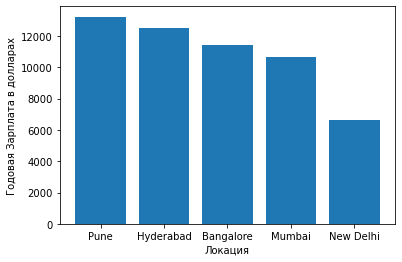

In [37]:
fig, ax = plt.subplots()
ax.bar(mean_by_loc['Location'], mean_by_loc['Quantity'], linewidth='0.5')
plt.ylabel('Годовая Зарплата в долларах')
plt.xlabel('Локация')
plt.show()

In [40]:
df['Field'] = 'Other'
wData =  df['Job Title'].str.contains("Data")
wScience = df['Job Title'].str.contains("Science")
wScientist = df['Job Title'].str.contains("Scientist")
wMachine = df['Job Title'].str.contains("Machine")
wLearning = df['Job Title'].str.contains("Learning")
wEngineer = df['Job Title'].str.contains("Engineer")
wEngineering = df['Job Title'].str.contains("Engineering")
wAnalyst = df['Job Title'].str.contains("Analyst")

df['Field'].loc[wData & (wScience | wScientist) & ~wMachine] = 'Data Science'
df['Field'].loc[wData & (wEngineer | wEngineering)] = 'Data Engineering'
df['Field'].loc[wMachine & wLearning & ~(wData & wScientist)] = 'Machine Learning'
df['Field'].loc[wData & wAnalyst & ~(wMachine | wScientist)] = 'Data Analysis'

df['Level'] = 'Mid'

wJunior =  df['Job Title'].str.contains("Junior")
wTrainee = df['Job Title'].str.contains("Trainee")
wConsultant = df['Job Title'].str.contains("Consultant")
wSenior = df['Job Title'].str.contains("Senior")
wLead = df['Job Title'].str.contains("Lead")
wManager = df['Job Title'].str.contains("Manager")

df['Level'].loc[wJunior | wTrainee] = 'Junior'
df['Level'].loc[wConsultant] = 'Consultant'
df['Level'].loc[wSenior] = 'Senior'
df['Level'].loc[wManager| wLead] = 'Manager'

/Users/amirhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


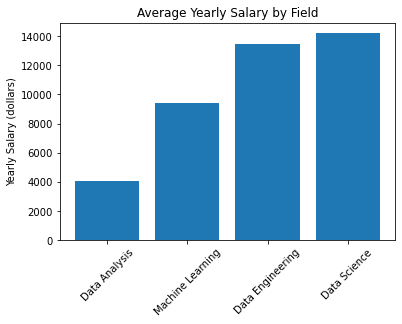

In [44]:
mean_by_field = df.groupby(['Field'])[['Quantity']].agg('mean').sort_values('Quantity', ascending=True).reset_index()
plt.bar(mean_by_field['Field'], mean_by_field['Quantity'])
plt.xlabel('')
plt.ylabel('Yearly Salary (dollars)')
plt.title('Average Yearly Salary by Field')
plt.xticks(rotation='45')
plt.show()

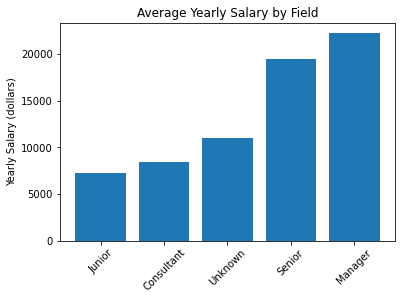

In [51]:
mean_by_level = df.groupby(['Level'])[['Level','Quantity']].agg('mean').reset_index().sort_values('Quantity', ascending=True)
plt.bar(mean_by_level['Level'],mean_by_level['Quantity'])
plt.xlabel('')
plt.ylabel('Yearly Salary (dollars)')
plt.title('Average Yearly Salary by Field')
plt.xticks(rotation='45')
plt.show()

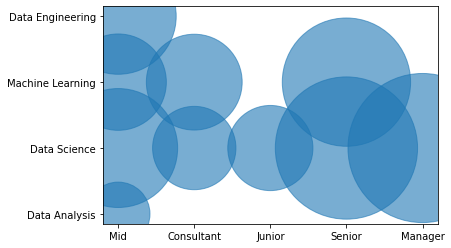

In [96]:
mean_by_position = df.groupby(['Level','Field'])[['Quantity']].agg('mean').reset_index().sort_values('Quantity', ascending=True)
plt.scatter(mean_by_position['Level'], mean_by_position['Field'], mean_by_position['Quantity'], alpha=0.6)
plt.show()